In [1]:
import json
from collections import Counter
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.colors as mcolors
import collections

In [2]:
fm.fontManager.addfont('Sahel.ttf')
matplotlib.rc('font', family='Sahel')

In [40]:
def plot_sunburst(questions, title):
    first_question_word = [q.split()[0] for q in questions]
    second_question_word = [q.split()[1] for q in questions]
    third_question_word = []
    forth_question_word = []

    for q in questions:
        if len(q.split()) > 2:
            third_question_word.append(q.split()[2])
        else:
            third_question_word.append(" ")

        if len(q.split()) > 3:
            forth_question_word.append(q.split()[3])
        else:
            forth_question_word.append(" ")

    df = pd.DataFrame()
    df['first'] = first_question_word
    df['second'] = second_question_word
    df['third'] = third_question_word
    df['forth'] = forth_question_word
    
    total_count = len(df)
    duplicate_count = len(df[df.duplicated()])
    
    df = df[df.duplicated(keep=False)]
    
    
    unique_count = total_count - len(df)
    
    print('total count of questions = ', total_count)
    print('total count of 4-word questios =', duplicate_count + unique_count )
    print('duplicate count of 4-word questions = ', duplicate_count)
    print('unique count of 4-word questions = ', unique_count)
    
    fig = px.sunburst(df, path=['first', 'second','third','forth'],width=500, height=500)
    fig.update_traces(textfont=dict(family=['Arial Black', 'Arial'],size=[100]))
    fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
    fig.write_html(f"{title}.html")
    fig.write_image(f"{title}.png", scale=5)
    fig.show()

In [3]:
def make_farsi_text(x):
    reshaped_text = reshape(x)
    farsi_text = get_display(reshaped_text)
    return farsi_text

In [78]:
def plot_num_question_length_distribution(questions,file_name):
    question_lengths = [len(q.split()) for q in questions]
    questions_len_dict = dict(Counter(question_lengths))

    plt.title(make_farsi_text('توزیع سوالات با طول کلمات مختلف'))
    plt.bar(*zip(*questions_len_dict.items()))
    plt.xlabel(make_farsi_text('تعداد کلمات در سوال'))
    plt.ylabel(make_farsi_text('تعداد سوالات'))

    plt.savefig(f'{file_name}.png')
    plt.show()

In [79]:
def plot_percent_question_length_distribution(questions, file_name):
    
    question_lengths = [len(q.split()) for q in questions]
    questions_len_dict = dict(Counter(question_lengths))

    questions_percentage_len_dict = {key: (questions_len_dict[key] / len(questions)) * 100 for key in questions_len_dict}

    plt.title(make_farsi_text('توزیع سوالات با طول کلمات مختلف'))
    plt.bar(*zip(*questions_percentage_len_dict.items()))
    plt.xlabel(make_farsi_text('تعداد کلمات در سوال'))
    plt.ylabel(make_farsi_text('درصد سوالات'))
    plt.savefig(f'{file_name}.png')
    plt.show()

In [4]:
def plot_comparison_question_length(human_questions, template_questions, file_name):

    question_lengths = [len(q.split()) for q in human_questions]
    questions_len_dict = collections.OrderedDict(sorted(Counter(question_lengths).most_common()))

    human_questions_percentage_len_dict = {key: (questions_len_dict[key] / len(human_questions)) * 100 for key in questions_len_dict}

    question_lengths = [len(q.split()) for q in template_questions]
    questions_len_dict = collections.OrderedDict(sorted(Counter(question_lengths).most_common()))

    template_questions_percentage_len_dict = {key: (questions_len_dict[key] / len(template_questions)) * 100 for key in questions_len_dict}

    plt.title(make_farsi_text('توزیع سوالات با طول کلمات مختلف'))
    plt.plot(*zip(*human_questions_percentage_len_dict.items()),'-o', label = make_farsi_text('انسانی'))
    plt.plot(*zip(*template_questions_percentage_len_dict.items()), '-o', label = make_farsi_text('مصنوعی'))
    plt.xlabel(make_farsi_text('تعداد کلمات در سوال'))
    plt.ylabel(make_farsi_text('درصد سوالات'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{file_name}.png', dpi=300)
    plt.show()


In [81]:
def plot_num_answer_length_distribution(data, file_name):
    long_answers = []
    for entry in data:
        if type(entry['long_answer']) == list:
            long_answers.extend(iter(entry['long_answer']))
        else:
            long_answers.append(entry['long_answer'])

    long_answer_length = [len(ans.split())for ans in long_answers]
    long_answer_len_dict = dict(Counter(long_answer_length))

    plt.title(make_farsi_text('توزیع پاسخ‌های بلند با طول‌های مختلف'))
    plt.bar(*zip(*long_answer_len_dict.items()))
    plt.xlabel(make_farsi_text('تعداد کلمات در پاسخ بلند'))
    plt.ylabel(make_farsi_text('تعداد پاسخ های بلند'))

    plt.savefig(f'{file_name}.jpeg')
    plt.show()

In [82]:
def plot_percent_answer_length_distribution(data, file_name):
    long_answers = []
    for entry in data:
        if type(entry['long_answer']) == list:
            long_answers.extend(iter(entry['long_answer']))
        else:
            long_answers.append(entry['long_answer'])

    long_answer_length = [len(ans.split())for ans in long_answers]
    long_answer_len_dict = dict(Counter(long_answer_length))

    long_answer_percentage_len_dict = {key: (long_answer_len_dict[key] / len(long_answer_length)) * 100 for key in long_answer_len_dict}

    plt.title(make_farsi_text('توزیع پاسخ‌های بلند با طول‌های مختلف'))
    plt.bar(*zip(*long_answer_percentage_len_dict.items()))
    plt.xlabel(make_farsi_text('تعداد کلمات در پاسخ بلند'))
    plt.ylabel(make_farsi_text('درصد پاسخ های بلند'))

    plt.savefig(f'{file_name}.png')
    plt.show()

In [5]:
def plot_comparison_answer_length(answer_type, human_data, template_data, file_name):
    answers = []
    for entry in human_data:
        if type(entry[answer_type]) == list:
            answers.extend(iter(entry[answer_type]))
        else:
            answers.append(entry[answer_type])

    answer_length = [len(ans.split()) for ans in answers]
    answer_len_dict = collections.OrderedDict(sorted(Counter(answer_length).most_common()))

    human_answer_percentage_len_dict = {key: (answer_len_dict[key] / len(answer_length)) * 100 for key in answer_len_dict}

    answers = []
    for entry in template_data:
        if type(entry[answer_type]) == list:
            answers.extend(iter(entry[answer_type]))
        else:
            answers.append(entry[answer_type])

    answer_length = [len(ans.split())for ans in answers]
    answer_len_dict = collections.OrderedDict(sorted(Counter(answer_length).most_common()))

    template_answer_percentage_len_dict = {key: (answer_len_dict[key] / len(answer_length)) * 100 for key in answer_len_dict}

    text = 'بلند' if answer_type =='long_answer' else 'کوتاه'
    
    plt.title(make_farsi_text(f'توزیع پاسخ‌های {text} با طول‌های مختلف'))
    plt.plot(*zip(*human_answer_percentage_len_dict.items()),'-o', label=make_farsi_text('انسانی'))
    plt.plot(*zip(*template_answer_percentage_len_dict.items()),'-o', label=make_farsi_text('مصنوعی'))
    plt.xlabel(make_farsi_text(f'تعداد کلمات در پاسخ {text}'))
    plt.ylabel(make_farsi_text(f'درصد پاسخ های {text}'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{file_name}.png', dpi=300)
    plt.show()

# Human-based

In [6]:
json_path_file = '../processed/preprocessed_parsvqa_human_based.json'

with open(json_path_file, encoding='utf-8-sig') as json_file:
  human_data = json.load(json_file)

human_questions = [entry['question'] for entry in human_data ]

## First Four Words in Questions

In [42]:
plot_sunburst(human_questions,'sunburst_human')

total count of questions =  2176
total count of 4-word questios = 2057
duplicate count of 4-word questions =  199
unique count of 4-word questions =  1858


## Number/Percentage of Questions with different lengths

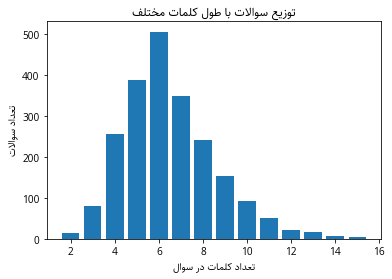

In [86]:
plot_num_question_length_distribution(human_questions, 'num_question_length_dist_human')

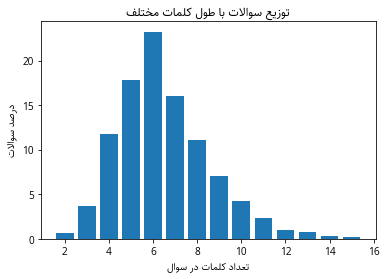

In [87]:
plot_percent_question_length_distribution(human_questions, 'percent_question_length_dist_human')

## Number/Percentage of long answers with different word lengths

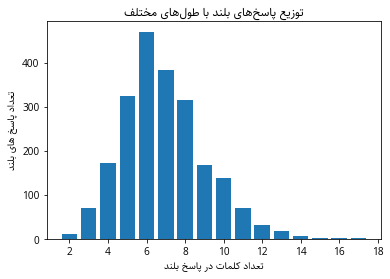

In [88]:
plot_num_answer_length_distribution(human_data, 'num_answer_length_dist_human')

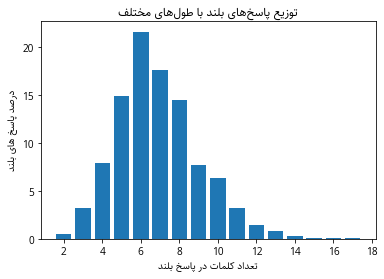

In [89]:
plot_percent_answer_length_distribution(human_data, 'percent_answer_length_dist_human')

## Distribution of short answers per question category

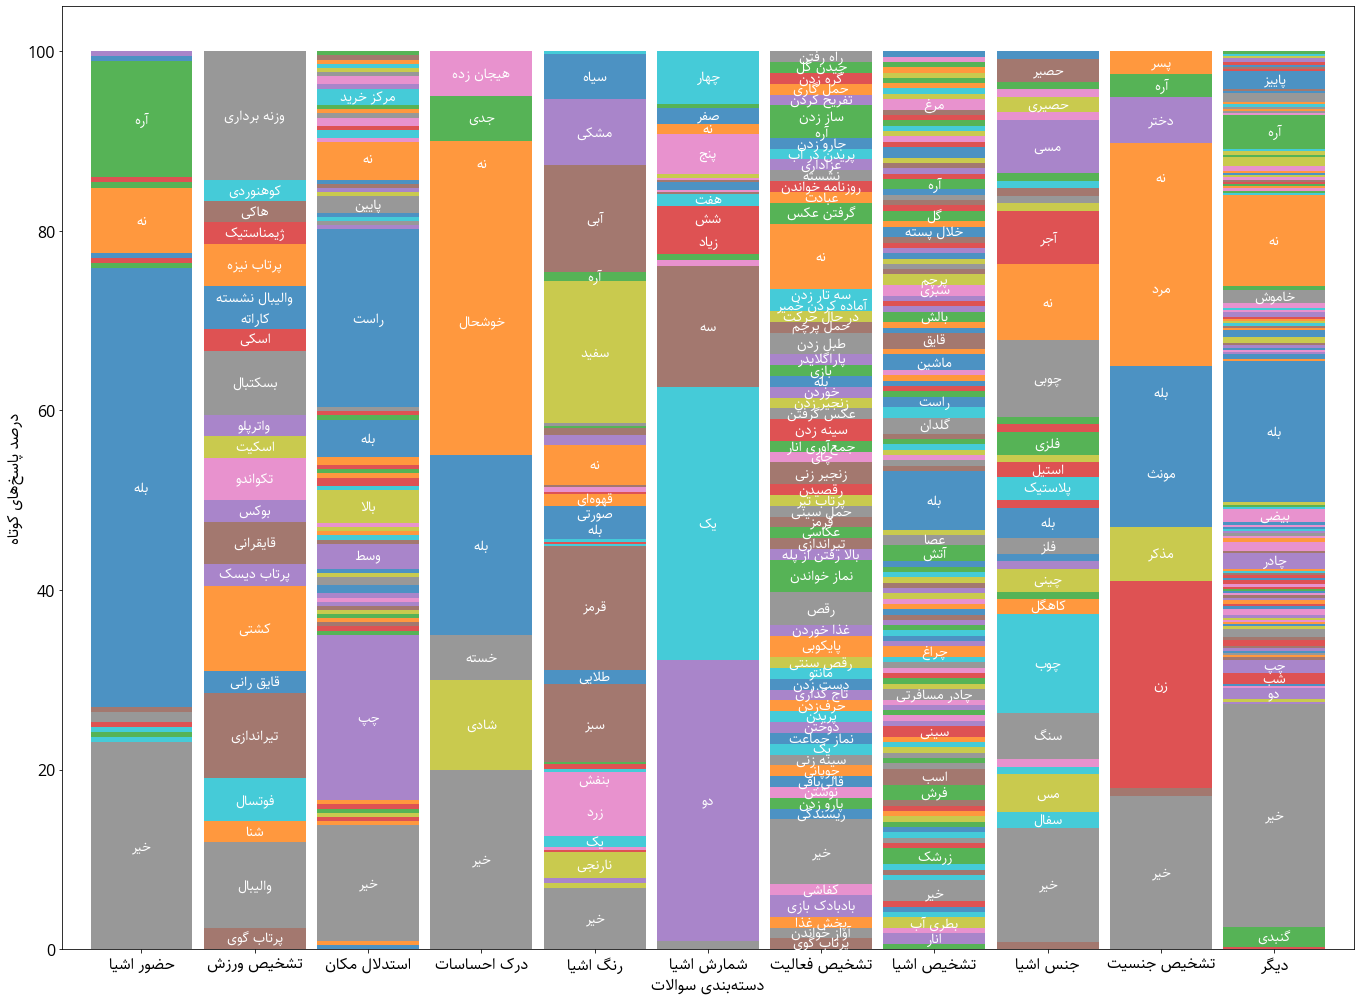

In [53]:
category = ["object presence",
            "sport recognition",
            "positional reasoning",
            "sentiment understanding",
            "color attributes",
            "counting object",
            "activity recognition",
            "object detection",
            "object material",
            "gender recognition",
            "other"]

cat_english_to_farsi = {
    'object detection':make_farsi_text('تشخیص اشیا'),
    'other': make_farsi_text('دیگر'),
    'color attributes': make_farsi_text('رنگ اشیا'),
    'positional reasoning': make_farsi_text('استدلال مکان'),
    'sport recognition': make_farsi_text('تشخیص ورزش'),
    'sentiment understanding':make_farsi_text('درک احساسات'),
    'activity recognition':make_farsi_text('تشخیص فعالیت'),
    'object presence':make_farsi_text('حضور اشیا'),
    'counting object':make_farsi_text('شمارش اشیا'),
    'gender recognition':make_farsi_text('تشخیص جنسیت'),
    'object material':make_farsi_text('جنس اشیا')
    }

all_ans = list({entry['short_answer'] for entry in human_data})
all_ans_dict = {ans : [0]*len(category)  for ans in all_ans}

for i, cat in enumerate(category):
    cat_ans = [entry['short_answer']for entry in human_data if entry['category'] == cat]
    ans_dict = dict(Counter(cat_ans))
    for key in ans_dict:

        all_ans_dict[key][i] = ans_dict[key]

all_ans_dict = {key : tuple(all_ans_dict[key]) for key in all_ans_dict}

category = [cat_english_to_farsi[cat] for cat in category]
index = pd.Index(category, name='Answers per category')
df = pd.DataFrame(all_ans_dict, index=index)
df = df.div(df.sum(axis=1), axis=0)* 100

ax = df.plot(kind='bar', stacked=True , figsize = (19, 14), legend = False, width=0.9, alpha=0.8)

for c, col in zip(ax.containers, df.columns):
    labels = [make_farsi_text(col) if v.get_height() > 1 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='w', fontsize=14)

plt.xticks(rotation='horizontal', fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylabel(make_farsi_text('درصد پاسخ‌های کوتاه'), fontsize=16)
ax.set_xlabel(make_farsi_text('دسته‌بندی سوالات'), fontsize=16)
plt.tight_layout()
plt.savefig('distribution_short_answer_per_category_human.png', dpi=300)
plt.show()

# Template-based

In [7]:
json_path_file = '../processed/preprocessed_parsvqa_template_based.json'

with open(json_path_file, encoding='utf-8-sig') as json_file:
  template_data = json.load(json_file)

template_questions = [entry['question'] for entry in template_data ]

## First Four Words in Questions

In [41]:
plot_sunburst(template_questions,'sunburst_template')

total count of questions =  26437
total count of 4-word questios = 23394
duplicate count of 4-word questions =  20461
unique count of 4-word questions =  2933


## Number/Percentage of Questions with different lengths

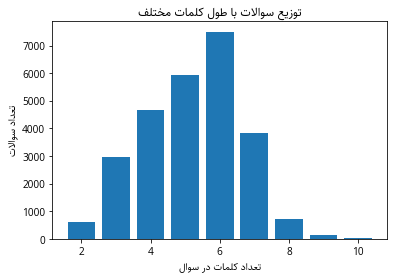

In [93]:
plot_num_question_length_distribution(template_questions, 'num_question_length_dist_template')

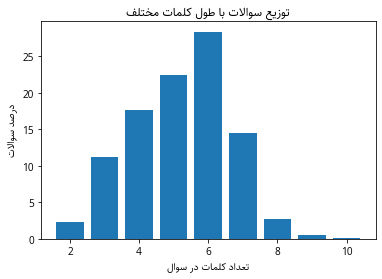

In [94]:
plot_percent_question_length_distribution(template_questions, 'percent_question_length_dist_template')

## Number/Percentage of long answers with different word lengths

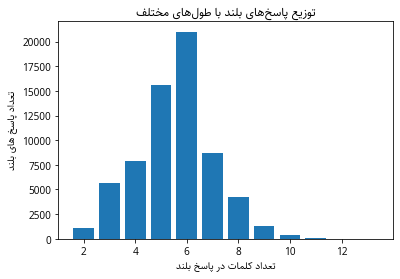

In [95]:
plot_num_answer_length_distribution(template_data, 'num_answer_length_dist_template')

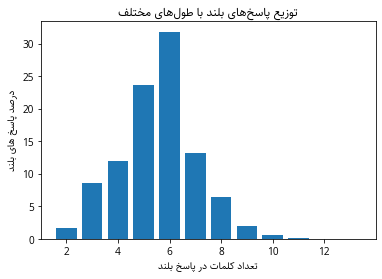

In [96]:
plot_percent_answer_length_distribution(template_data, 'percent_answer_length_dist_template')

## Distribution of short answers per question category

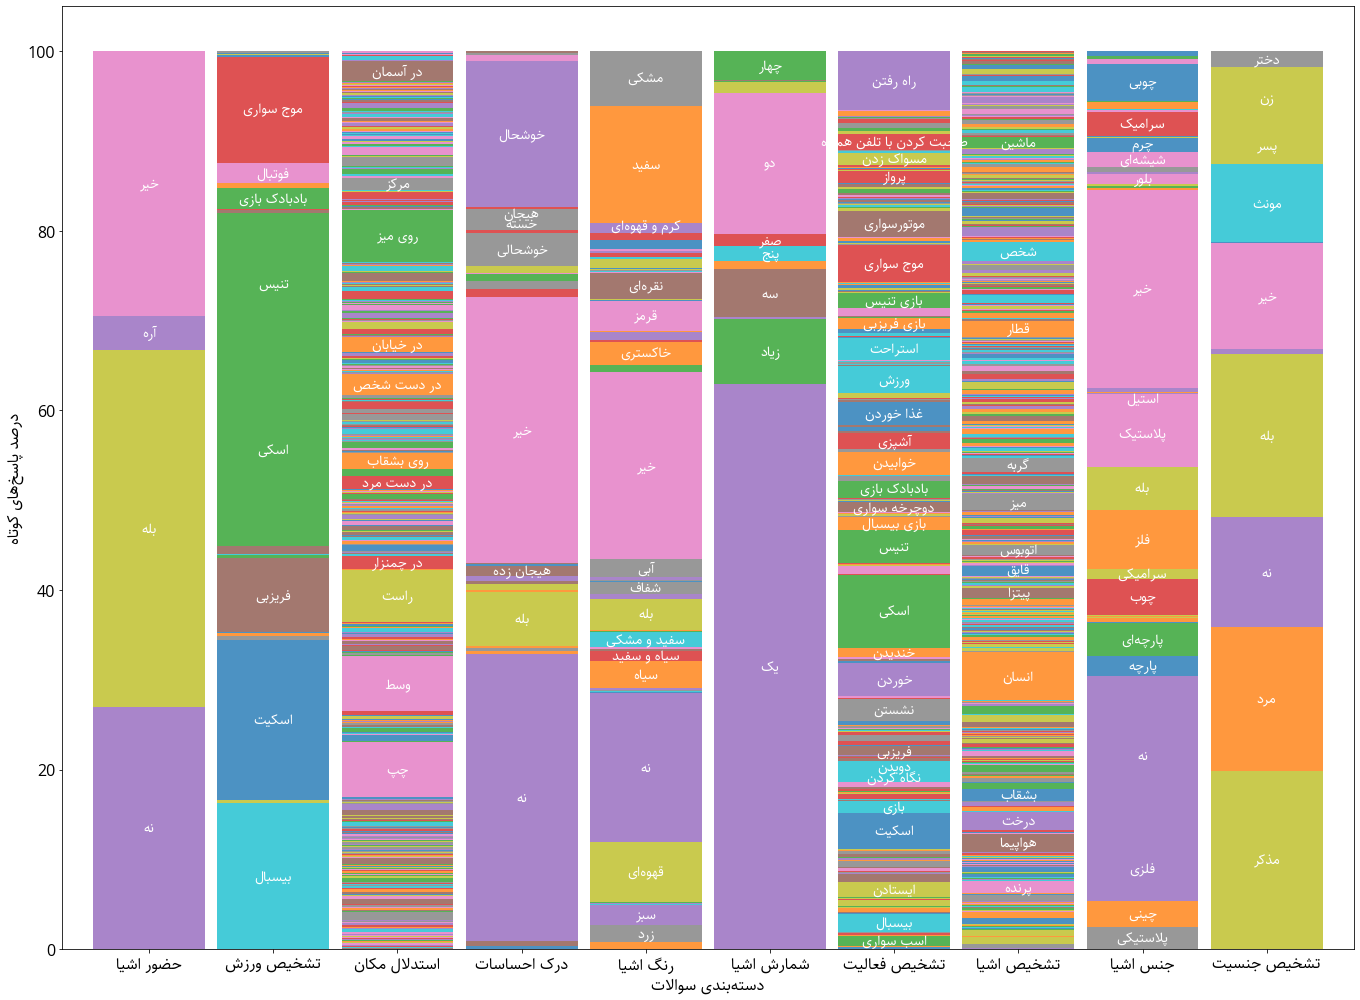

In [55]:
all_ans = list({entry['short_answer'] for entry in template_data})
all_ans_dict = {ans : [0]*10  for ans in all_ans}

for cat in range(1,11):
    cat_ans = [entry['short_answer']for entry in template_data if entry['category_id'] == cat]
    ans_dict = dict(Counter(cat_ans))
    for key in ans_dict:
        # if ans_dict[key] > 3:
        all_ans_dict[key][cat-1] = ans_dict[key]

all_ans_dict = {key : tuple(all_ans_dict[key]) for key in all_ans_dict}

cat_num_to_farsi = {1:make_farsi_text('حضور اشیا'),
            2: make_farsi_text('تشخیص ورزش'),
            3: make_farsi_text('استدلال مکان'),
            4: make_farsi_text('درک احساسات'),
            5: make_farsi_text('رنگ اشیا'),
            6: make_farsi_text('شمارش اشیا'),
            7: make_farsi_text('تشخیص فعالیت'),
            8: make_farsi_text('تشخیص اشیا'),
            9: make_farsi_text('جنس اشیا'),
            10: make_farsi_text('تشخیص جنسیت'),
            11: make_farsi_text('دیگر')}

category = [cat_num_to_farsi[cat] for cat in range(1,11)]
index = pd.Index(category, name='Answers per category')
df = pd.DataFrame(all_ans_dict, index=index)
df = df.div(df.sum(axis=1), axis=0)* 100

ax = df.plot(kind='bar', stacked=True , figsize = (19, 14), legend = False, width=0.9, alpha=0.8)

for c, col in zip(ax.containers, df.columns):
    labels = [make_farsi_text(col) if v.get_height() > 1 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='w', fontsize=14)

plt.xticks(rotation='horizontal', fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylabel(make_farsi_text('درصد پاسخ‌های کوتاه'), fontsize=16)
ax.set_xlabel(make_farsi_text('دسته‌بندی سوالات'), fontsize=16)
plt.tight_layout()
plt.savefig('distribution_short_answer_per_category_template.png', dpi=300)
plt.show()

# Comparison

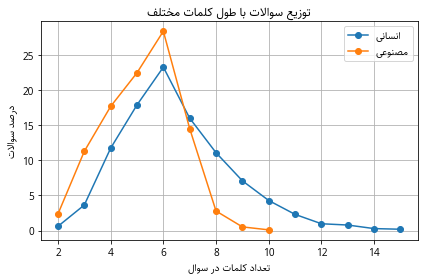

In [8]:
plot_comparison_question_length(human_questions, template_questions, 'comparison_question_length')

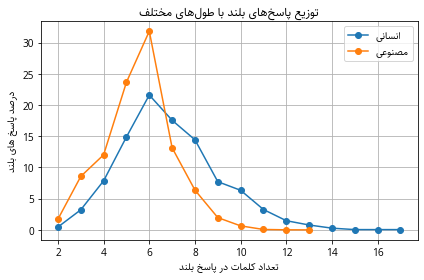

In [9]:
plot_comparison_answer_length('long_answer',human_data, template_data, 'comparison_long_answer_length')

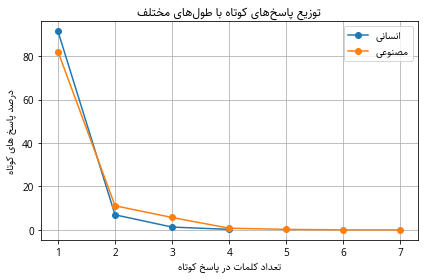

In [10]:
plot_comparison_answer_length('short_answer',human_data, template_data, 'comparison_short_answer_length')